In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [ ]:
# BALOCHISTAN : 

Saving Balochistan_Updated.csv to Balochistan_Updated (2).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null    float6

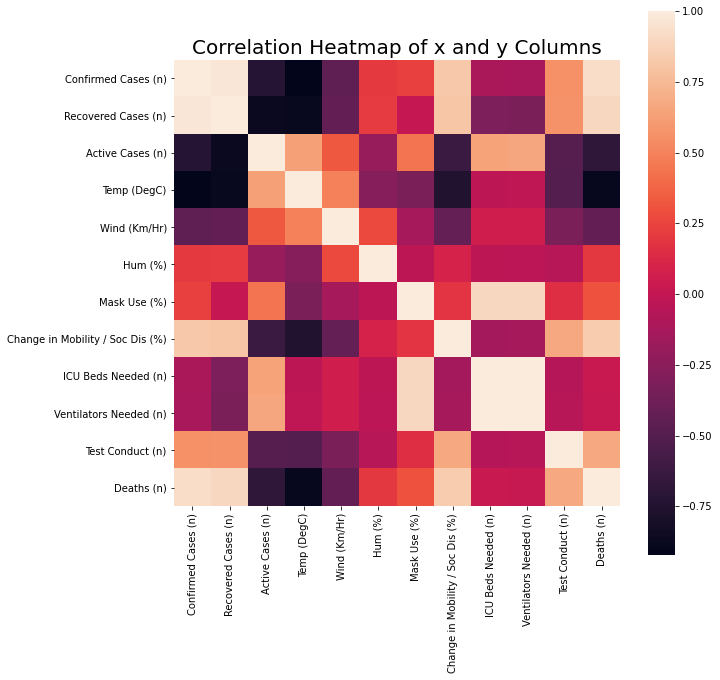

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.971606,-0.731669,-0.921350,-0.442003,0.206148,0.231605,0.824939,-0.116227,-0.122985,0.559908,0.926089
Recovered Cases (n),0.971606,1.000000,-0.872070,-0.879319,-0.430743,0.216003,0.014095,0.808001,-0.307666,-0.316495,0.570603,0.900932
Active Cases (n),-0.731669,-0.872070,1.000000,0.628721,0.328187,-0.195429,0.437187,-0.624975,0.645185,0.656631,-0.489487,-0.683149
Temp (DegC),-0.921350,-0.879319,0.628721,1.000000,0.491419,-0.273958,-0.316199,-0.750611,-0.027236,-0.018718,-0.495507,-0.884241
Wind (Km/Hr),-0.442003,-0.430743,0.328187,0.491419,1.000000,0.266283,-0.133099,-0.423363,0.065880,0.068795,-0.316409,-0.432445
Hum (%),0.206148,0.216003,-0.195429,-0.273958,0.266283,1.000000,-0.027212,0.094693,-0.021038,-0.032706,-0.050854,0.198134
Mask Use (%),0.231605,0.014095,0.437187,-0.316199,-0.133099,-0.027212,1.000000,0.186242,0.897207,0.900692,0.155130,0.303234
Change in Mobility / Soc Dis (%),0.824939,0.808001,-0.624975,-0.750611,-0.423363,0.094693,0.186242,1.000000,-0.136465,-0.133152,0.669888,0.838708
ICU Beds Needed (n),-0.116227,-0.307666,0.645185,-0.027236,0.065880,-0.021038,0.897207,-0.136465,1.000000,0.999329,-0.059765,0.031446
Ventilators Needed (n),-0.122985,-0.316495,0.656631,-0.018718,0.068795,-0.032706,0.900692,-0.133152,0.999329,1.000000,-0.055879,0.021465


In [ ]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_baloc = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_baloc.info());
print('\n')
print(df_baloc.describe())

dff = df_baloc.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [ ]:
# data pre processing 

x = df_baloc.iloc[:, 2:-1]
y = df_baloc.iloc[:, -1] 

x = x.drop(['Hum (%)','ICU Beds Needed (n)','Ventilators Needed (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 8)
y data shape :  (183,)


x-train data shape :  (146, 8)
x-test data shape :  (37, 8)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [ ]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [164 165 165 165 166 166 167 169 169 169 169 169 169 169 170 171 173 173
 175 175 175 176 176 177 179 179 179 179 179 181 181 181 182 182 182 182
 183]

 Predicted-y using lin reg: 
 [152.09 151.86 151.54 151.64 150.71 150.77 150.9  150.9  150.85 150.64
 150.88 150.84 150.46 150.9  151.23 151.29 151.63 151.76 151.81 151.85
 152.   152.27 152.25 152.15 152.48 152.53 152.33 153.05 153.12 153.23
 153.05 153.57 153.66 154.01 154.84 155.09 154.76]

Accuracy obt from lin reg model :  88.0  %


In [ ]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,433
Trainable params: 34,433
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 93.9701 - mean_squared_error: 12283.7755
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 32.3370 - mean_squared_error: 1362.9983
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 36.9932 - mean_squared_error: 1899.0432
Epoch 4/250
30/30 [================

In [ ]:
ypred = model.predict(xts)

ya_baloc = np.array(yts)
yp_baloc = np.array(ypred)

print('\nya_baloc ~vs~ yp_baloc')
for i in range(len(yts)): 
  print(ya_baloc[[i]],'vs',yp_baloc[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_baloc[i]-yp_baloc[i])/ya_baloc[i])

err_baloc = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_baloc,2))*100,' %')


ya_baloc ~vs~ yp_baloc
[164] vs [158.64471]
[165] vs [158.9088]
[165] vs [159.34546]
[165] vs [159.36021]
[166] vs [159.82964]
[166] vs [160.22511]
[167] vs [160.47679]
[169] vs [160.81303]
[169] vs [161.366]
[169] vs [162.43512]
[169] vs [163.77112]
[169] vs [166.01282]
[169] vs [166.83586]
[169] vs [166.59987]
[170] vs [167.38461]
[171] vs [168.90791]
[173] vs [169.30328]
[173] vs [170.89302]
[175] vs [172.63182]
[175] vs [171.97093]
[175] vs [172.52495]
[176] vs [171.3935]
[176] vs [172.29787]
[177] vs [173.37477]
[179] vs [172.62314]
[179] vs [173.59813]
[179] vs [173.01634]
[179] vs [171.62741]
[179] vs [170.53824]
[181] vs [169.67485]
[181] vs [169.01237]
[181] vs [168.89023]
[182] vs [168.56964]
[182] vs [168.51085]
[182] vs [168.48955]
[182] vs [168.66599]
[183] vs [169.09428]

Accuracy obt from deep nueral network :  96.0  %


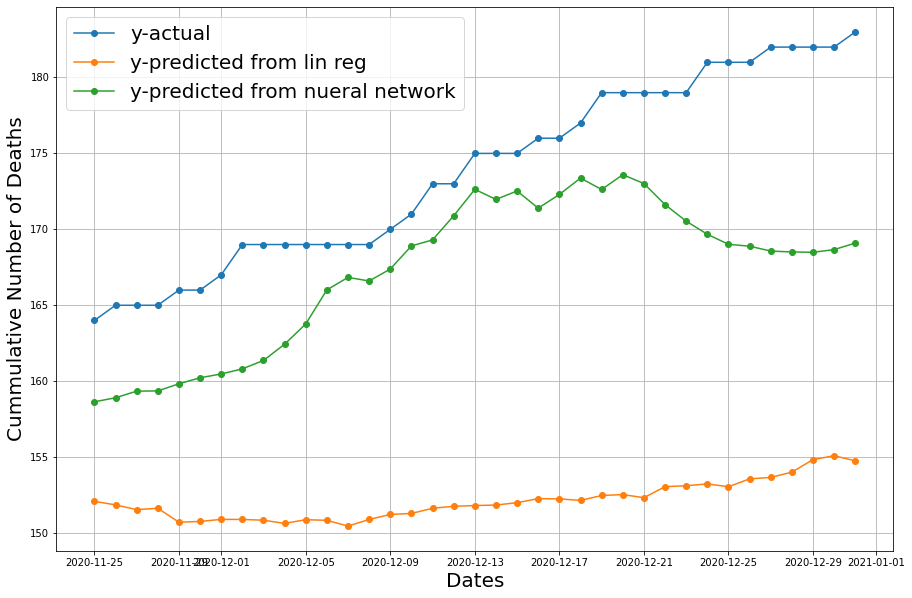

In [ ]:
dts = df_baloc['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_baloc, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_baloc, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 